# data analysis

In [2]:
import csv
from matplotlib.pyplot import *
import matplotlib.colors
import numpy
from matplotlib.animation import FuncAnimation

N = 31

# Display transaction history 

Opens 'transactions.csv'.
Displays plot of stock price over time.

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


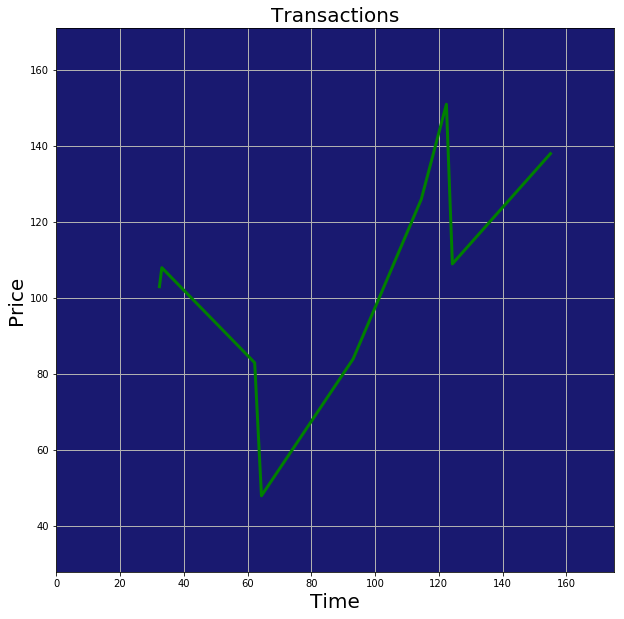

In [56]:
n_trials = 15
time_period = 240
transactions = []

with open('transactions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count * time_period) + float(row[0])), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]
  

# nums = np.arange(0, 600, 100)


figure(1, figsize=(10,10))
xlabel('Time',fontsize=20)
ylabel('Price',fontsize=20)
title("Transactions", fontsize=20)
# p1 = scatter(time, price, marker='x', color='red')
p1 = plot(time, price, 'green', linewidth=3)
# p1 = plot(trials[i], 'green', linewidth=3)
p1 = plot()
ax = axes()
ax.set_facecolor('midnightblue')
ylim(ymin=min(price)-20, ymax=max(price)+20)
xlim(xmin=0, xmax=max(time)+20)
grid(linestyle='-', linewidth=1)
show()

# Display avg_balance history

Read from 'avg_balance.csv' and display the data in a plot of average balance over time.

['trial0001', ' 000030', ' ON-ZIC', ' 155', ' 60', ' 2.583333', ' 21', ' 65', ' 0', ' 0']
['trial0001', ' 000030', ' ON-ZIC', ' 260', ' 60', ' 4.333333', ' 21', ' 34', ' 0', ' 0']
['trial0001', ' 000030', ' ON-ZIC', ' 290', ' 60', ' 4.850000', ' 19', ' 34', ' 0', ' 0']
['trial0001', ' 000060', ' ON-ZIC', ' 371', ' 60', ' 6.183333', ' 21', ' 47', ' 0', ' 0']
['trial0001', ' 000060', ' ON-ZIC', ' 390', ' 60', ' 6.500000', ' 21', ' 28', ' 0', ' 0']
['trial0001', ' 000061', ' ON-ZIC', ' 557', ' 60', ' 9.283333', ' 22', ' 28', ' 0', ' 0']
['trial0001', ' 000090', ' ON-ZIC', ' 668', ' 60', ' 11.133333', ' 16', ' 28', ' 0', ' 0']
['trial0001', ' 000090', ' ON-ZIC', ' 848', ' 60', ' 14.133333', ' 16', ' 28', ' 0', ' 0']
['trial0001', ' 000092', ' ON-ZIC', ' 879', ' 60', ' 14.650000', ' 21', ' 28', ' 0', ' 0']
['trial0001', ' 000120', ' ON-ZIC', ' 885', ' 60', ' 14.750000', ' 18', ' 34', ' 0', ' 0']
['trial0001', ' 000121', ' ON-ZIC', ' 1053', ' 60', ' 17.550000', ' 20', ' 28', ' 0', ' 0']
['tr

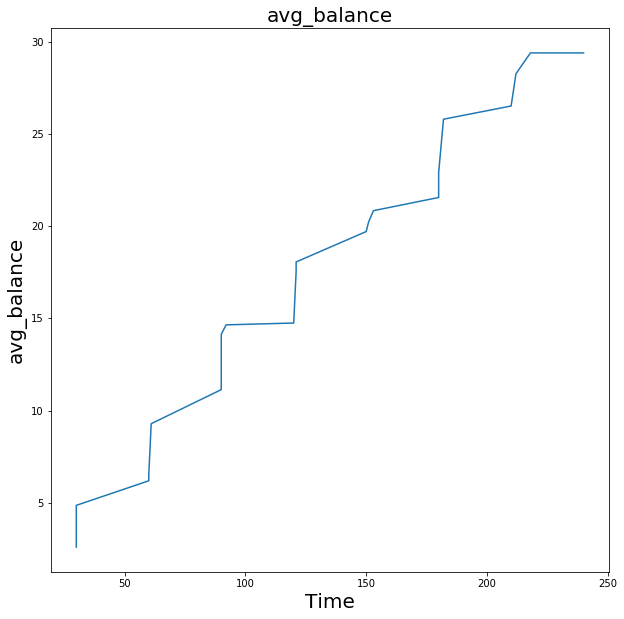

In [49]:
# trial = []
time = []
avg_balance = []

trial_no = 1
with open('avg_balance.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    for row in readCSV:
        print(row)
        time.append(float(row[1]))
        #trial.append(trial_no)
        #trial_no += 1
        avg_balance.append(float(row[5]))

figure(2, figsize=(10,10))
xlabel('Time', fontsize=20)
ylabel('avg_balance', fontsize=20)
title("avg_balance", fontsize=20)
p2 = plot(time, avg_balance)
# ylim(ymin=0, ymax=200)
# xlim(xmin=0, xmax=180)
show()

# Price bubbles

Using the method described in ``Asset Price Bubbles and Crashes with near-zero intelligence traders" (2004).

/Applications/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


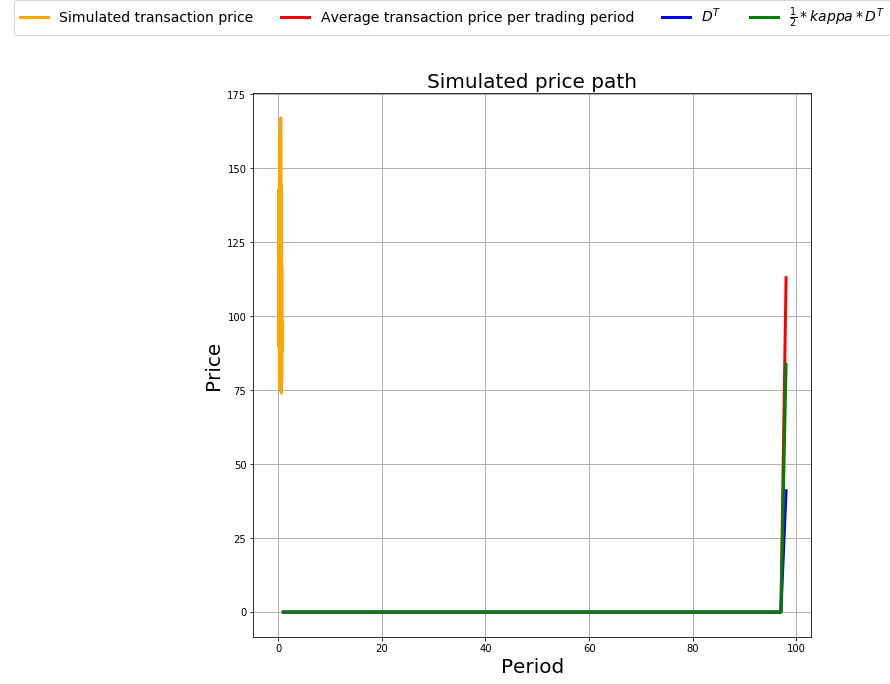

In [52]:
averages = []
defaults = []
period = []
half_kappa = []

with open('avg_balance.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    n = 1
    for row in readCSV:
        averages.append(float(row[8]))
        defaults.append(float(row[9]))
        half_kappa.append(1/2 * 4.0846 * float(row[9]))
        period.append(n)
        n+=1
        
n_trials = 15
time_period = 240
transactions = []

with open('transactions.csv') as csv_file:
    readCSV = csv.reader(csv_file, delimiter=',')
    previous_time = 0
    trial_count = 0
    for row in readCSV:
        if float(row[0]) >= previous_time:
            transactions.append([((trial_count) + float(row[0])/time_period), float(row[1])])
        else:
            trial_count += 1
        previous_time = float(row[0])

time = np.array(transactions)[:,0]
price = np.array(transactions)[:,1]

fig = figure(6, figsize=(10,10))
xlabel('Period',fontsize=20)
ylabel('Price',fontsize=20)
title("Simulated price path", fontsize=20)
# p1 = scatter(time, price, marker='x', color='red')
p4 = plot(time, price, 'orange', linewidth=3, label='Simulated transaction price')

p1 = plot(period, averages, 'red', linewidth=3, label='Average transaction price per trading period')

p2 = plot(period, defaults, 'blue', linewidth=3, label=r'$D^T$')
p3 = plot(period, half_kappa, 'green', linewidth=3, label=r'$\frac{1}{2} * kappa * D^T$')

ax = axes()
# ax.set_facecolor('midnightblue')
# ylim(ymin=min(defaults)-20, ymax=max(half_kappa)+20)
# xlim(xmin=0, xmax=max(period)+1)
grid(linestyle='-', linewidth=1)
fig.legend(borderaxespad=0., prop={'size': 14}, ncol=4)
show()